In [2]:
import pandas as pd
all_data = pd.read_csv('./all_data.csv')
all_data = all_data.groupby(['date','user_id']).mean().reset_index()
ques_morning_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
ques_evening_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_dams.csv')

ques_morning_dams = ques_morning_dams[['user_id','date','positive_score','depressive_score','anxious_score']]
ques_evening_dams = ques_evening_dams[['user_id','date','positive_score','depressive_score','anxious_score']]

In [3]:
all_data_use = all_data[['user_id','date','食事','単独作業', '趣味・休憩', '家事・育児', '休憩（業務時間内）', '移動', 'web会議', 'その他', '業務外作業','対面会議', '共同作業（コミュニケーションを伴う）', '電話（会議）','age','sex','管理者兼作業者', '企画業務', 'ノンコア業務（自身が本来担当ではない業務）', '管理者','比較的慣れており，定型化できている業務', 'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務','作業者/参加者', '管理の業務', '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務','事務業務（サポート業務、経理業務など）', '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）', '家（その他）','どちらでもない', '一人', '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）', '快適','職場外のワークスペース', '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外', '不快','非常に快適', '職場外ワークスペース', '非常に不快']]
cluster_data = pd.merge(all_data_use, ques_morning_dams, on=['user_id','date'])
cluster_data = pd.merge(cluster_data, ques_evening_dams, on=['user_id','date'])

In [4]:
cluster_data=cluster_data.rename(columns={'食事':'meals','単独作業':'working_alone', '趣味・休憩':'hobbies/breaks', '家事・育児':'housework/childcare', '休憩（業務時間内）':'breaks(induty)', '移動':'travel', 'web会議':'web_conference', 'その他':'other', '業務外作業':'non_work','対面会議':'facettoface_meetings', '共同作業（コミュニケーションを伴う）':'collaborative_work', '電話（会議）':'telephone(conference)','管理者兼作業者':'manager_and_operator','企画業務':'planning_tasks','ノンコア業務（自身が本来担当ではない業務）':'noncore_tasks','管理者':'manager','比較的慣れており，定型化できている業務':'standardized_tasks','コア業務（自身が本来担当している業務）':'core_tasks','共同作業者':'collaborators','開発業務':'development_tasks','管理業務':'manager_tasks','作業者/参加者':'operator/paticipants','管理の業務':'management_tasks','比較的新規性が高く，試行錯誤を伴う定型化できていない業務':'non_standardized_tasks','営業業務':'sales_tasks','事務業務（サポート業務、経理業務など）':'office_tasks','現場業務（主に肉体労働を伴うもの）':'field_tasks','現場（主に肉体労働を伴うもの）':'field','家（その他）':'home(other)','どちらでもない':'neither','一人':'alone','家（書斎など執務向けの場所）':'home(placeforwork)','他者あり（同僚など）':'with_others(colleagues_and)','家（リビングなど）':'home(living)','快適':'comfortable','職場外のワークスペース':'workspace_outside','他者あり（無干渉）':'with_others(nointeraction)','他者あり（同僚）':'with_others(colleagues)','職場':'workplace','他者あり（家族など）':'with_others(family)','店/外':'store/outside','不快':'uncomfortable','非常に快適':'very_comfortable','職場外ワークスペース':'workplace_outside_office','非常に不快':'extremely_uncomfortable'})

print(cluster_data)
task_df = cluster_data[['meals','working_alone', 'hobbies/breaks', 'housework/childcare', 'breaks(induty)', 'travel', 'web_conference', 'other', 'non_work','facettoface_meetings', 'collaborative_work', 'telephone(conference)',
'manager_and_operator','planning_tasks','noncore_tasks','manager','standardized_tasks','core_tasks','collaborators','development_tasks','manager_tasks','operator/paticipants','management_tasks','non_standardized_tasks','sales_tasks','office_tasks','field_tasks','field','home(other)','neither','alone','home(placeforwork)','with_others(colleagues_and)','home(living)','comfortable','workspace_outside','with_others(nointeraction)','with_others(colleagues)','workplace','with_others(family)','store/outside','uncomfortable','very_comfortable','workplace_outside_office','extremely_uncomfortable']]


# cluster_data.loc[cluster_data['meals']<0, 'meals']=0
# cluster_data.loc[cluster_data['working_alone']<0, 'working_alone']=0
# cluster_data.loc[cluster_data['hobbies/breaks']<0, 'hobbies/breaks']=0
# cluster_data.loc[cluster_data['housework/childcare']<0, 'housework/childcare']=0
# cluster_data.loc[cluster_data['breaks(induty)']<0, 'breaks(induty)']=0
# cluster_data.loc[cluster_data['travel']<0, 'travel']=0
# cluster_data.loc[cluster_data['web_conference']<0, 'web_conference']=0
# cluster_data.loc[cluster_data['other']<0, 'other']=0
# cluster_data.loc[cluster_data['non_work']<0, 'non_work']=0
# cluster_data.loc[cluster_data['facettoface_meetings']<0, 'facettoface_meetings']=0
# cluster_data.loc[cluster_data['collaborative_work']<0, 'collaborative_work']=0
# cluster_data.loc[cluster_data['telephone(conference)']<0, 'telephone(conference)']=0
cluster_data['age']=cluster_data['age'].fillna(43)



     user_id        date      meals  working_alone  hobbies/breaks  \
0          7  2021-01-12   0.044983       0.000000        0.000000   
1          8  2021-01-12   6.866667       0.000000       45.633333   
2         10  2021-01-12   0.010333       0.000000        0.000000   
3         12  2021-01-12   7.967950       0.000000        0.000000   
4         13  2021-01-12  57.242667       0.000000        0.000000   
..       ...         ...        ...            ...             ...   
892       96  2021-01-29  63.356767     322.150000      223.162050   
893       98  2021-01-29   0.000000     343.000000        0.000000   
894       99  2021-01-29   5.000000     478.366667      312.000000   
895      103  2021-01-29  88.315550     471.756250        0.000000   
896      104  2021-01-29  11.133333     476.733900       32.400000   

     housework/childcare  breaks(induty)      travel  web_conference  \
0                 0.0000         0.00000   30.000000        0.000000   
1              

In [5]:
def replace_under_zero(df):
    columns = list(df.columns)
    columns.remove('date')
    columns.remove('user_id')
    df = df.fillna(0)
    for i in range(len(columns)):
        print(columns[i])
        df.loc[df[columns[i]]<0, columns[i]]=0
    return df
cluster_data = replace_under_zero(cluster_data)

meals
working_alone
hobbies/breaks
housework/childcare
breaks(induty)
travel
web_conference
other
non_work
facettoface_meetings
collaborative_work
telephone(conference)
age
sex
manager_and_operator
planning_tasks
noncore_tasks
manager
standardized_tasks
core_tasks
collaborators
development_tasks
manager_tasks
operator/paticipants
management_tasks
non_standardized_tasks
sales_tasks
office_tasks
field_tasks
field
home(other)
neither
alone
home(placeforwork)
with_others(colleagues_and)
home(living)
comfortable
workspace_outside
with_others(nointeraction)
with_others(colleagues)
workplace
with_others(family)
store/outside
uncomfortable
very_comfortable
workplace_outside_office
extremely_uncomfortable
positive_score_x
depressive_score_x
anxious_score_x
positive_score_y
depressive_score_y
anxious_score_y


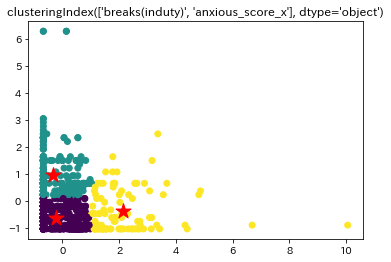

In [6]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np
import japanize_matplotlib

X=cluster_data[[
   #   'meals',
   #  'working_alone', 
   #  'hobbies/breaks', 
   #  'housework/childcare', 
    'breaks(induty)', 
   #  'travel', 
   #  'web_conference', 
   #  'other', 
   #  'non_work',
   #  'facettoface_meetings', 
   #  'collaborative_work', 
   #  'telephone(conference)',
      #   'age',
      #  'sex',
    #      'コア業務（自身が本来担当している業務）', 'ノンコア業務（自身が本来担当ではない業務）',
      #  'positive_score_x'
      #  'depressive_score_x', 
    'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
       ]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
# クラスタリング
cls = KMeans(n_clusters=3)
result = cls.fit(X_norm)
# 結果を出力
columns=X.columns
plt.title('clustering{}'.format(columns))
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

In [7]:
from sklearn import datasets, preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from pyclustering.cluster import gmeans, xmeans
import itertools

In [8]:
X=cluster_data[[
    # 'meals',
    'working_alone'
    # 'hobbies/breaks', 
    # 'housework/childcare',
    # 'breaks(induty)',
    # 'travel',
    # 'web_conference',
    # 'other', 
    # 'non_work',
    # 'facettoface_meetings',
    # 'collaborative_work', 
    # 'telephone(conference)'
       ]]
Y=cluster_data[[       'positive_score_x'
    #    'depressive_score_x', 'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
    ]]

## Xmeans法を用いたクラスタリング

In [9]:
#　pcaで次元圧縮
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vecs_list=pca.fit_transform(X)

# # 元データをプロット
# fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=Y)
# fig.show()

pred = KMeans(n_clusters=8).fit_predict(X)

# k-meansによるクラスタをプロット
x_columns = X.columns
y_columns = Y.columns
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=pred,
                title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()

# X-means
xmeans_instance = xmeans.xmeans(X).process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

labels_size = len(
    list(itertools.chain.from_iterable(clusters))
)
labels = np.zeros((1, labels_size))
for n, n_th_cluster in np.ndenumerate(clusters):
    for img_num in n_th_cluster:
        labels[0][img_num] = n[0]
labels = labels.ravel()

# x-meansによるクラスタをプロット
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=labels,
                      title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

## 階層クラスタリング

In [10]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [16]:
cluster_data.query('user_id == 74')

,user_id,date,meals,working_alone,hobbies/breaks,housework/childcare,breaks(induty),travel,web_conference,other,...,uncomfortable,very_comfortable,workplace_outside_office,extremely_uncomfortable,positive_score_x,depressive_score_x,anxious_score_x,positive_score_y,depressive_score_y,anxious_score_y
93,74,2021-01-13,0.000000,294.521583,57.433333,157.000000,132.983333,0.000000,276.454067,0.0,...,0.0,0.0,0.0,0.0,2.333333,2.333333,2.333333,3.000000,0.666667,1.333333
168,74,2021-01-14,0.000000,234.797117,256.950000,118.083333,16.866667,69.447933,58.000000,0.0,...,0.0,0.0,0.0,0.0,1.333333,2.333333,1.333333,1.000000,1.000000,1.666667
235,74,2021-01-15,24.000000,64.566667,92.700000,57.000000,41.000000,0.000000,323.000000,0.0,...,0.0,0.0,0.0,0.0,1.333333,0.333333,1.000000,1.666667,1.333333,1.333333
334,74,2021-01-18,0.000000,34.516667,60.416667,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.333333,1.333333,0.000000
443,74,2021-01-20,0.000000,404.333333,75.233333,80.000000,64.000000,0.000000,1679.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333
564,74,2021-01-22,0.000000,104.800000,0.000000,0.000000,24.000000,31.959250,121.365317,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.666667,0.000000,0.000000
650,74,2021-01-25,0.000000,0.000000,51.449167,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000
704,74,2021-01-26,0.022133,251.841350,0.000000,142.121833,61.000000,0.000000,310.000000,0.0,...,0.0,0.0,0.0,0.0,0.666667,1.333333,0.000000,0.333333,0.000000,0.000000
877,74,2021-01-29,0.000000,0.000000,0.000000,0.017217,187.565317,21.585150,204.032233,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000


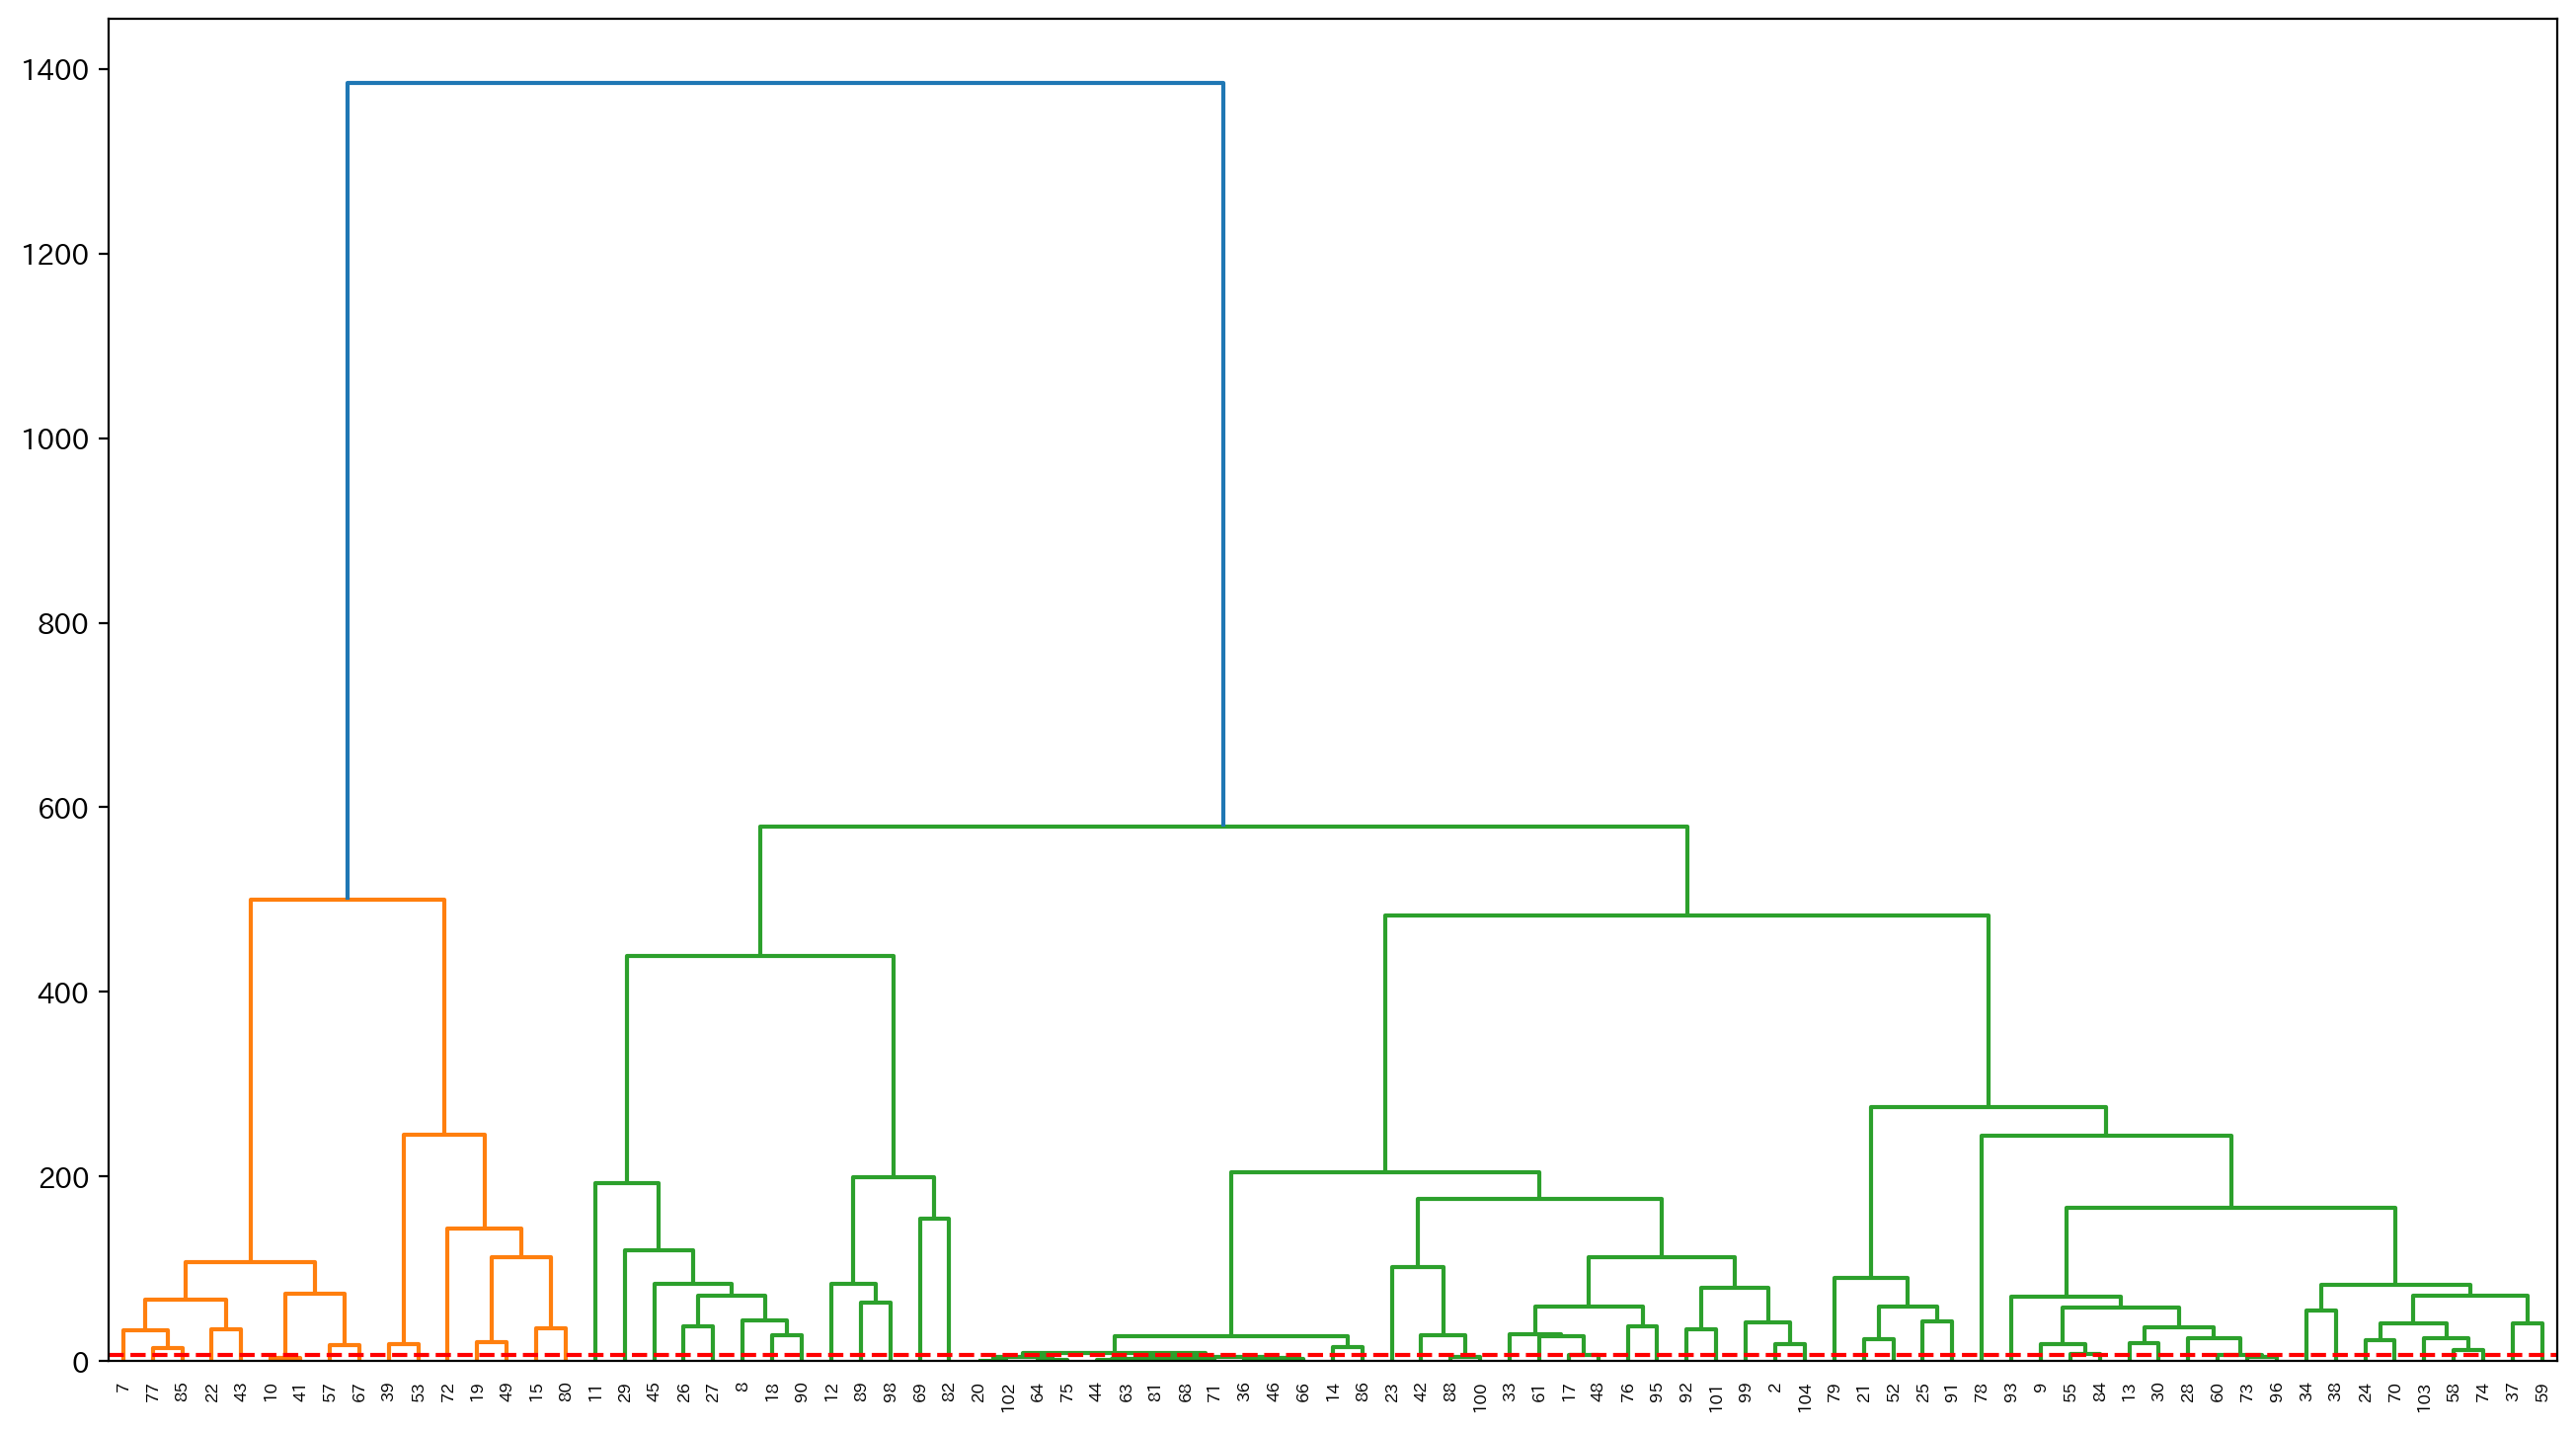

[2 1 2 2 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2
 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
            alone  with_others(colleagues_and)  with_others(nointeraction)  \
user_id                                                                      
2        0.061934                     0.010394                    0.249587   
7        0.392527                     0.211646                    0.116767   
8        0.049090                     0.530510                    0.141394   
9        0.179649                     0.068151                    0.000000   
10       0.533282                     0.000000                    0.000000   

         with_others(colleagues)  with_others(family)  positive_score_x  \
user_id                                                                   
2                       0.000000             0.000000          0.558987   
7                       0.034817             0.000000     

(0.0, 1.0)

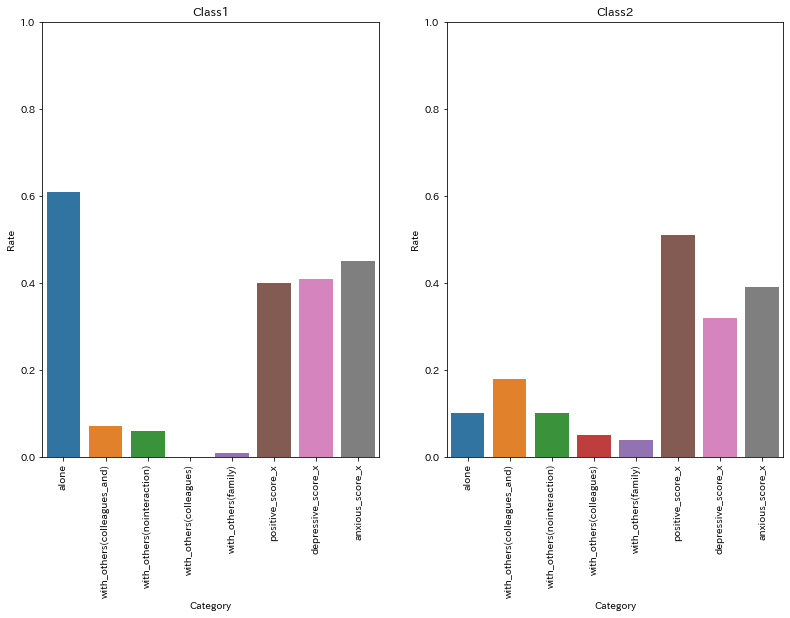

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
layered_cluster_all = cluster_data[[ 'user_id',
# 'meals','working_alone', 'hobbies/breaks', 'housework/childcare', 'breaks(induty)', 'travel', 'web_conference', 'other', 'non_work','facettoface_meetings', 'collaborative_work', 'telephone(conference)',
# 'manager_and_operator','manager','collaborators','operator/paticipants',
# 'management_tasks','non_standardized_tasks','sales_tasks','office_tasks','field_tasks','development_tasks','planning_tasks','noncore_tasks','standardized_tasks','core_tasks','manager_tasks',

# 'field','home(other)','home(placeforwork)','home(living)','workspace_outside','workplace','store/outside','workplace_outside_office',

# 'neither','extremely_uncomfortable','uncomfortable','very_comfortable','comfortable',

'alone','with_others(colleagues_and)','with_others(nointeraction)','with_others(colleagues)','with_others(family)',
'positive_score_x','depressive_score_x', 'anxious_score_x']].groupby('user_id').mean()
# 階層型クラスタリングの実施
# ウォード法 x ユークリッド距離
linkage_result = linkage(layered_cluster_all, method='ward', metric='euclidean')

# クラスター分けするしきい値を決める
threshold = 0.7 * np.max(linkage_result[:, 2])
# 階層型クラスタリングの可視化
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=layered_cluster_all.index, color_threshold=threshold)
plt.axhline(7, linestyle='--', color='r')
plt.show()

# クラスタリング結果の値を取得
clustered = fcluster(linkage_result, threshold, criterion='distance')
# クラスタリング結果を確認
print(clustered)

# テーブル全体を正規化
def minmax_norm(df):
    return (df - df.min()) / (df.max() - df.min())
layered_cluster_all = minmax_norm(layered_cluster_all)

# 階層クラスター分析の結果をDataFrame化
_class = pd.DataFrame({'class':clustered}, index= layered_cluster_all.index)
_class.head()

# 元データと分析結果を結合
layered_cluster_all_class = pd.concat([layered_cluster_all, _class] ,axis=1)
print(layered_cluster_all_class.head())

# 各セグメントの顧客数を確認 
layered_cluster_all_class.groupby('class').size()

# セグメントごとにすべての商品カテゴリの平均値を算出
cluster_stats = np.round(layered_cluster_all_class.groupby('class', as_index=False).mean() ,2)
cluster_stats.head()

# グラフ描画のために、縦長のデータ形式に変換
mat_melt = pd.melt(cluster_stats, id_vars='class', var_name='Category',value_name='Rate')
mat_melt.head()

# セグメントの特徴をグラフにする
fig = plt.figure(figsize =(35,8))
ax1 = fig.add_subplot(1, 5, 1)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 1], ax=ax1)
plt.title('Class' + '1')
plt.xticks(rotation=90)
plt.ylim(0, 1)

ax2 = fig.add_subplot(1, 5, 2)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 2], ax=ax2)
plt.title('Class' + '2')
plt.xticks(rotation=90)
plt.ylim(0, 1)

# ax2 = fig.add_subplot(1, 5, 3)
# sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 3], ax=ax2)
# plt.title('Class' + '3')
# plt.xticks(rotation=90)
# plt.ylim(0, 1)

# ax2 = fig.add_subplot(1, 5, 4)
# sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 4], ax=ax2)
# plt.title('Class' + '4')
# plt.xticks(rotation=90)
# plt.ylim(0, 1)


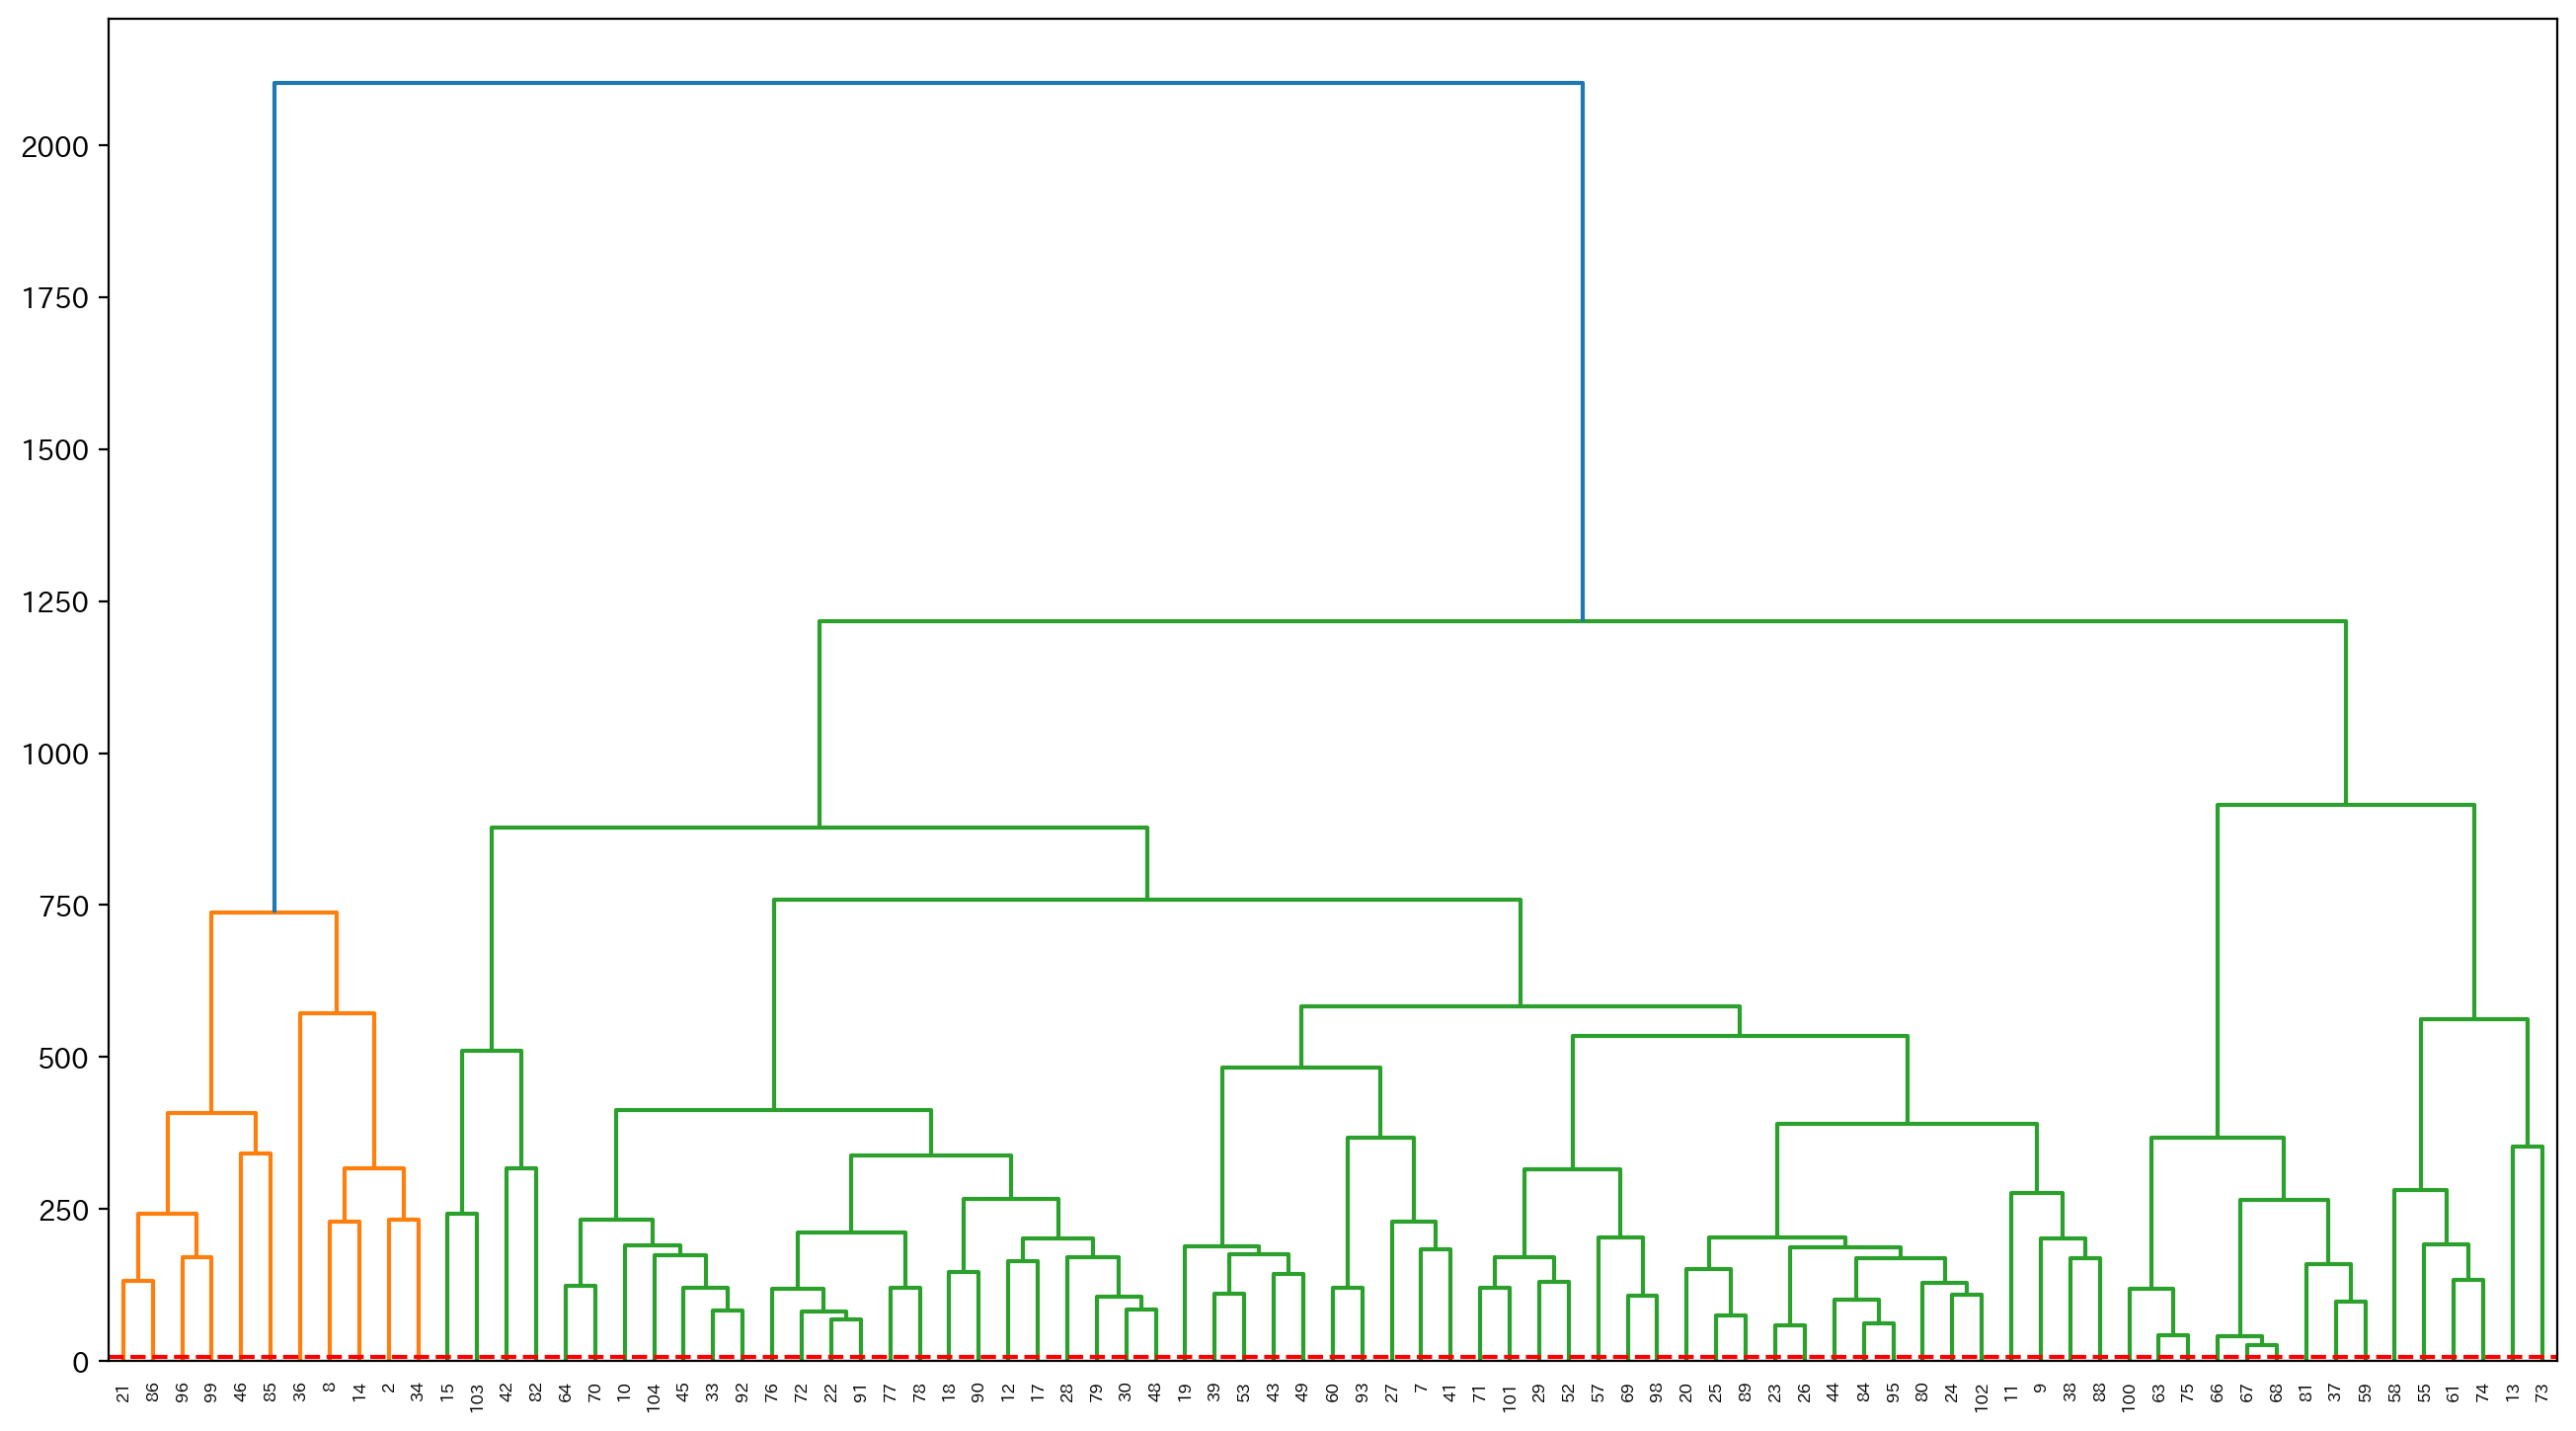

In [41]:
# クラスター分析のライブラリのインポート
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
layered_cluster_data = cluster_data[[ 'user_id','meals','working_alone', 'hobbies/breaks', 'housework/childcare', 'breaks(induty)', 'travel', 'web_conference', 'other', 'non_work','facettoface_meetings', 'collaborative_work', 'telephone(conference)','positive_score_x','depressive_score_x', 
    'anxious_score_x']].groupby('user_id').mean()
# 階層型クラスタリングの実施
# ウォード法 x ユークリッド距離
linkage_result = linkage(layered_cluster_data, method='ward', metric='euclidean')

# クラスター分けするしきい値を決める
threshold = 0.7 * np.max(linkage_result[:, 2])
# 階層型クラスタリングの可視化
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=layered_cluster_data.index, color_threshold=threshold)
plt.axhline(7, linestyle='--', color='r')
plt.show()

In [274]:
# クラスタリング結果の値を取得
clustered = fcluster(linkage_result, threshold, criterion='distance')
# クラスタリング結果を確認
print(clustered)

# テーブル全体を正規化
def minmax_norm(df):
    return (df - df.min()) / (df.max() - df.min())
layered_cluster_data = minmax_norm(layered_cluster_data)

# 階層クラスター分析の結果をDataFrame化
_class = pd.DataFrame({'class':clustered}, index= layered_cluster_data.index)
_class.head()

# 元データと分析結果を結合
layered_cluster_data2 = pd.concat([layered_cluster_data, _class] ,axis=1)
print(layered_cluster_data2.head())



[1 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 2 1 2 1 2 2 2 2 1]
            meals  working_alone  hobbies/breaks  housework/childcare  \
user_id                                                                 
2        0.182454       0.161101        0.744537             0.020052   
7        0.194630       0.409441        0.064572             0.008721   
8        0.034686       0.273574        0.658611             0.013740   
9        0.207811       0.317100        0.000005             0.000000   
10       0.037629       0.445833        0.430664             0.002013   

         breaks(induty)    travel  web_conference     other  non_work  \
user_id                                                                 
2              0.781067  0.296671        0.005151  0.000000  0.614205   
7              0.315563  0.109013        0.001662  0.029743  0.113285   
8              0.428363  0

In [275]:
# 各セグメントの顧客数を確認 
layered_cluster_data2.groupby('class').size()

# セグメントごとにすべての商品カテゴリの平均値を算出
cluster_stats = np.round(layered_cluster_data2.groupby('class', as_index=False).mean() ,2)
cluster_stats.head()

# グラフ描画のために、縦長のデータ形式に変換
mat_melt = pd.melt(cluster_stats, id_vars='class', var_name='Category',value_name='Rate')
mat_melt.head()

,class,Category,Rate
0,1,meals,0.08
1,2,meals,0.08
2,3,meals,0.07
3,1,working_alone,0.30
4,2,working_alone,0.32


(0.0, 1.0)

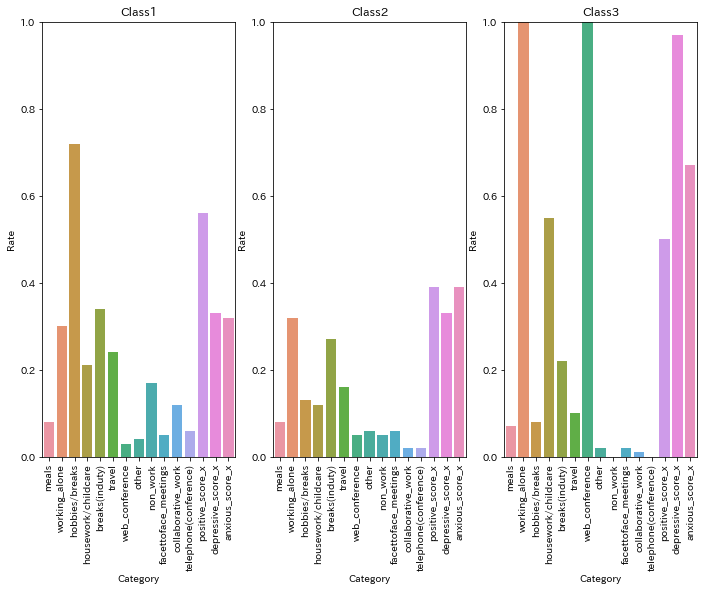

In [276]:
# セグメントの特徴をグラフにする
fig = plt.figure(figsize =(20,8))
ax1 = fig.add_subplot(1, 5, 1)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 1], ax=ax1)
plt.title('Class' + '1')
plt.xticks(rotation=90)
plt.ylim(0, 1)

ax2 = fig.add_subplot(1, 5, 2)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 2], ax=ax2)
plt.title('Class' + '2')
plt.xticks(rotation=90)
plt.ylim(0, 1)

ax3 = fig.add_subplot(1, 5, 3)
sns.barplot(x='Category', y='Rate', data=mat_melt[mat_melt['class'] == 3], ax=ax3)
plt.title('Class' + '3')
plt.xticks(rotation=90)
plt.ylim(0, 1)

,meals,working_alone,hobbies/breaks,housework/childcare,breaks(induty),travel,web_conference,other,non_work,facettoface_meetings,collaborative_work,telephone(conference),positive_score_x,depressive_score_x,anxious_score_x
user_id,,,,,,,,,,,,,,,
2,0.091227,0.115072,0.338426,0.013021,0.514227,0.148336,0.003679,0.000000,0.701187,0.053172,0.016956,0.299472,0.172446,0.002475,0.031365
7,0.175167,0.526425,0.052832,0.010194,0.373960,0.098112,0.002137,0.028681,0.232791,0.063261,0.026430,0.000000,0.261481,0.066832,0.363469
8,0.012718,0.143300,0.219537,0.006543,0.206814,0.004461,0.058684,0.002049,0.000034,0.000000,0.007496,0.088554,0.119963,0.091584,0.055351
9,0.055416,0.120800,0.000001,0.000000,0.043416,0.157208,0.002129,0.000000,0.000000,0.044610,0.013222,0.000000,0.049672,0.089109,0.083026
10,0.016306,0.275992,0.169656,0.001133,0.316597,0.000000,0.018183,0.000000,0.000000,0.000000,0.000000,0.000000,0.054358,0.000000,0.012915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.003324,0.017081,0.000000,0.000000,0.000000,0.000000,0.002767,0.000000,0.000000,0.113383,0.000000,0.000000,0.038425,0.009901,0.132841
101,0.020620,0.173827,0.046558,0.067826,0.272903,0.078949,0.072249,0.011396,0.000000,0.000000,0.000000,0.000000,0.119025,0.022277,0.020295
102,0.002432,0.013144,0.000000,0.000000,0.032836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011246,0.007426,0.007380
